In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import pandas as pd

from sklearn.datasets import load_iris, load_wine

import lib.baseline as baseline
import lib.util as util
from lib.baycon import baycon_explainer

from lib.eval.eval_metrics import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
X, true_y = load_wine(return_X_y=True)
km = KMeans(n_clusters=3)
y = km.fit_predict(X)

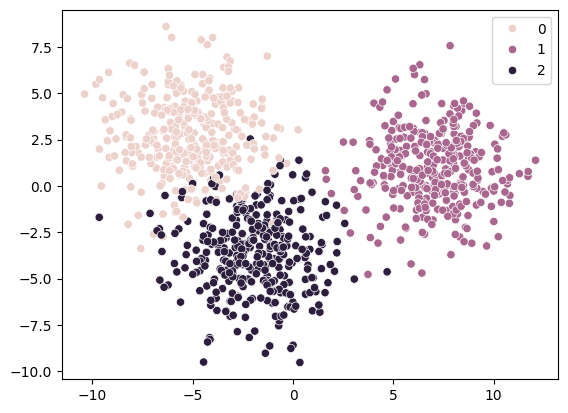

In [5]:
X, y = make_blobs(centers=3, cluster_std=2, n_features=2, n_samples=1000)
eX = PCA(n_components=2).fit_transform(X)
sns.scatterplot(x=eX[:, 0], y=eX[:, 1], hue=y)
plt.show()

In [6]:
idx = 0
print(f"init point cluster: {y[idx]}")
target_cluster = 2

init point cluster: 0


In [7]:
explainer = baycon_explainer
# classifier = MLPClassifier(hidden_layer_sizes=(6,4))
# classifier = LogisticRegression()
classifier = RandomForestClassifier(n_estimators=100)
cf = baseline.baseline_explainer(X, y, classifier, explainer, idx, target_cluster=target_cluster, binary=True)

Done training classifier. Score: 1.0
--- Executing... Initial Instance: 0 Target: 2 Run: 0 ---
--- Step 0: Load internal objects ---
--- Step 1: Generate initial neighbours ---
Generated initial neighbours: (192) CFs (10)
Re-training surrogate model with data size: 192
--- Step 2: Explore neighbourhood ---
--- epoch 1 ----
Generating neighbors for 1 near best instances
Generated neighbours: (1) Unique overall (1)
Generated random instances: (91)
Predicted top: 20 Counterfactuals: 20
Known alternatives: 212
Best instance score 0.4510 (X 0.90194 Y 1.0 F 0.5), found on epoch: 0
Re-training surrogate model with data size: 212
--- epoch 2 ----
Generating neighbors for 20 near best instances
Generated neighbours: (9) Unique overall (9)
Generated random instances: (72)
Predicted top: 20 Counterfactuals: 20
Known alternatives: 232
Best instance score 0.4510 (X 0.90194 Y 1.0 F 0.5), found on epoch: 0
Re-training surrogate model with data size: 232
--- epoch 3 ----
Generating neighbors for 20 ne

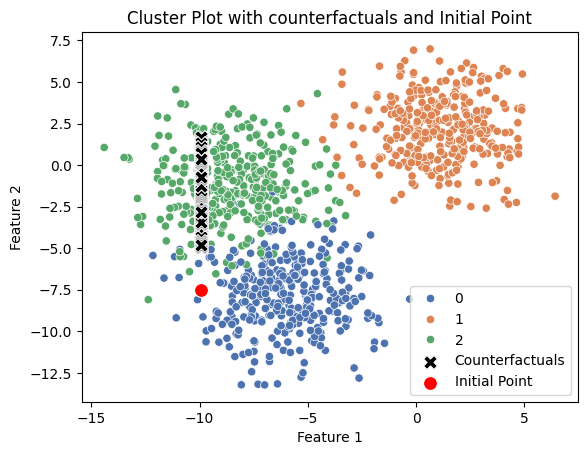

In [8]:
util.plot_cluster_cf(X, y, cf, idx)

In [9]:
print(f"minimality: {cf_minimality(cf, X[idx])}")
print(f"similarity: {cf_similarity(cf, X[idx])}")
print("plausibility", cf_plausibility(cf, target_cluster, X, y))

minimality: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
similarity: [4.32674997 2.60631968 6.53873177 5.43274087 2.60631968 3.83519846
 4.32674997 3.34364695 3.09787119 3.46653483 7.03028328 6.90739541
 4.94118936 5.06407724 5.18696512 5.30985299 5.55562875 5.67851663
 5.80140451 5.92429238 3.71231058 3.5894227  3.22075907 2.97498331
 2.85209544 7.5218348  7.39894692 7.27605904 7.15317116 8.50493782
 6.17006814 6.41584389 6.29295602 8.75071357 8.99648933 9.11937721
 9.24226509 8.87360145 8.13627418 4.44963785 4.20386209 4.08097421
 3.95808634 2.72920756 4.57252573 8.01338631 8.6278257  8.38204994
 8.25916206 4.6954136  7.76761055 7.64472267 6.78450753 6.66161965
 6.04718026 4.81830148 7.89049843 3.95808634 4.08097421 4.6954136
 6.29295602 6.66161965 6.78450753 7.64

In [10]:
idxs = np.argsort(-cf_plausibility(cf, target_cluster, X, y))
print(idxs)


[30 54 31 18 59 49 32 60 19 17 44 40  2 12  0  6 39 16 55 13 10 41 58 38
 45 56 65 53 61 14 25 52 62 11 27 57 42 26 34  3 28 37 64 50  5 33 35 15
 63 51 48 36 46 20 47 21 29  9  7 22  8 23 24 43  1  4]


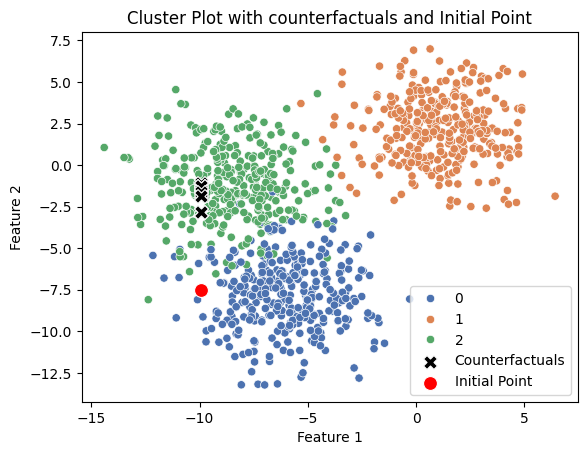

In [11]:
util.plot_cluster_cf(X, y, cf[idxs][0:10], idx)